In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from tabulate import tabulate

In [5]:
# Specify the file path of the Excel file
file_path = '/Users/sehwag/Library/CloudStorage/OneDrive-UniversityCollegeDublin/Microsoft Teams Chat Files/NFL Combine 2022-2000.xlsx'

# Read the Excel file
excel_data = pd.read_excel(file_path, sheet_name=None)

# Concatenate all sheets into one DataFrame
combined_df = pd.concat(excel_data.values(), ignore_index=True)

# Display the combined DataFrame
print(combined_df)

                 Player   Pos         School     Wt  40yd  Vertical  Bench  \
0          Cal Adomitis    LS     Pittsburgh  235.0  4.97      29.5   18.0   
1          Austin Allen    TE       Nebraska  253.0  4.83      34.0    NaN   
2           Chase Allen    TE       Iowa St.  251.0   NaN      33.5    NaN   
3     Christopher Allen  EDGE        Alabama  241.0   NaN       NaN    NaN   
4        Tyler Allgeier    RB            BYU  224.0  4.60      33.0    NaN   
...                 ...   ...            ...    ...   ...       ...    ...   
7675     Cedric Woodard    DT          Texas  290.0  5.21      30.5   23.0   
7676      Destry Wright    RB  Jackson State  216.0  4.84      29.5   15.0   
7677       Spergon Wynn    QB    Texas State  229.0  4.91      34.0    NaN   
7678      Bashir Yamini    WR           Iowa  191.0  4.53      33.0    NaN   
7679        Brian Young    DE  Texas-El Paso  278.0  4.94      29.5   27.0   

      Broad Jump  3Cone  Shuttle  year  Height Drafted  
0     

In [6]:
combined_df.head()

,Player,Pos,School,Wt,40yd,Vertical,Bench,Broad Jump,3Cone,Shuttle,year,Height,Drafted
0,Cal Adomitis,LS,Pittsburgh,235.0,4.97,29.5,18.0,107.0,7.53,4.62,2022,74,NO
1,Austin Allen,TE,Nebraska,253.0,4.83,34.0,NaN,121.0,7.00,4.26,2022,80,NO
2,Chase Allen,TE,Iowa St.,251.0,NaN,33.5,NaN,117.0,7.03,4.43,2022,78,NO
3,Christopher Allen,EDGE,Alabama,241.0,NaN,NaN,NaN,NaN,NaN,NaN,2022,76,NO
4,Tyler Allgeier,RB,BYU,224.0,4.60,33.0,NaN,120.0,NaN,NaN,2022,71,YES


In [7]:
column_name = "Shuttle"
median_value = combined_df[column_name].median()
combined_df[column_name].fillna(median_value, inplace=True)

In [8]:
# Replace occurrences of 1 in the "height" column with the median value
median_value = combined_df['Height'].median()
combined_df['Height'] = combined_df['Height'].replace(1, median_value)

In [9]:
# Replace occurrences of text in the "drafted" column with the binary value
combined_df['Drafted'] = combined_df['Drafted'].replace("YES", 1)
combined_df['Drafted'] = combined_df['Drafted'].replace("NO", 0)

In [10]:
missing_values = combined_df.isna().sum()
missing_values

Player           0
Pos              0
School           0
Wt              24
40yd           474
Vertical      1748
Bench         2584
Broad Jump    1821
3Cone         2888
Shuttle          0
year             0
Height           0
Drafted          0
dtype: int64

In [15]:
# Calculate summary statistics
summary_stats = combined_df.describe().round(2)

# Display the summary statistics
print(summary_stats)

            Wt     40yd  Vertical    Bench  Broad Jump    3Cone  Shuttle  \
count  7656.00  7206.00   5932.00  5096.00     5859.00  4792.00  7680.00   
mean    242.75     4.78     32.89    20.75      114.60     7.28     4.39   
std      45.25     0.30      4.22     6.38        9.35     0.42     0.21   
min     144.00     4.22     17.50     2.00       74.00     6.28     3.73   
25%     205.00     4.54     30.00    16.00      109.00     6.97     4.29   
50%     232.00     4.69     33.00    21.00      116.00     7.19     4.36   
75%     280.00     4.98     36.00    25.00      121.00     7.53     4.43   
max     384.00     6.05     46.50    49.00      147.00     9.12     5.56   

          year   Height  Drafted  
count  7680.00  7680.00  7680.00  
mean   2011.23    73.79     0.64  
std       6.69     2.64     0.48  
min    2000.00    64.00     0.00  
25%    2005.00    72.00     0.00  
50%    2011.00    74.00     1.00  
75%    2017.00    76.00     1.00  
max    2022.00    82.00     1.00  


,Wt,40yd,Vertical,Bench,Broad Jump,3Cone,Shuttle,year,Height,Drafted
0,7656.000000,7206.000000,5932.000000,5096.000000,5859.000000,4792.000000,7680.000000,7680.000000,7680.000000,7680.000000
1,242.748694,4.776363,32.894606,20.751766,114.596518,7.284451,4.385104,2011.228646,73.788932,0.642839
2,45.254869,0.304835,4.215423,6.384214,9.349189,0.417650,0.214051,6.692787,2.639391,0.479194
3,144.000000,4.220000,17.500000,2.000000,74.000000,6.280000,3.730000,2000.000000,64.000000,0.000000
4,205.000000,4.540000,30.000000,16.000000,109.000000,6.970000,4.290000,2005.000000,72.000000,0.000000
5,232.000000,4.690000,33.000000,21.000000,116.000000,7.190000,4.360000,2011.000000,74.000000,1.000000
6,280.000000,4.977500,36.000000,25.000000,121.000000,7.530000,4.430000,2017.000000,76.000000,1.000000
7,384.000000,6.050000,46.500000,49.000000,147.000000,9.120000,5.560000,2022.000000,82.000000,1.000000


In [40]:
filtered_height = combined_df['Height'] < 60
filtered_values = combined_df.loc[filtered_height, 'Height']

# Display the filtered values
print((filtered_values))
len(filtered_values)


Series([], Name: Height, dtype: int64)


0

In [10]:
# Convert the "year" column to datetime
combined_df['year'] = pd.to_datetime(combined_df['year'], format='%Y')

# Print the updated DataFrame
print(combined_df)

                 Player   Pos         School     Wt  40yd  Vertical  Bench  \
0          Cal Adomitis    LS     Pittsburgh  235.0  4.97      29.5   18.0   
1          Austin Allen    TE       Nebraska  253.0  4.83      34.0    NaN   
2           Chase Allen    TE       Iowa St.  251.0   NaN      33.5    NaN   
3     Christopher Allen  EDGE        Alabama  241.0   NaN       NaN    NaN   
4        Tyler Allgeier    RB            BYU  224.0  4.60      33.0    NaN   
...                 ...   ...            ...    ...   ...       ...    ...   
7675     Cedric Woodard    DT          Texas  290.0  5.21      30.5   23.0   
7676      Destry Wright    RB  Jackson State  216.0  4.84      29.5   15.0   
7677       Spergon Wynn    QB    Texas State  229.0  4.91      34.0    NaN   
7678      Bashir Yamini    WR           Iowa  191.0  4.53      33.0    NaN   
7679        Brian Young    DE  Texas-El Paso  278.0  4.94      29.5   27.0   

      Broad Jump  3Cone  Shuttle       year  Height  Drafted  


In [14]:
combined_df.to_csv('cleaned_data.csv', index=False)

In [13]:
combined_df.head()

,Player,Pos,School,Wt,40yd,Vertical,Bench,Broad Jump,3Cone,Shuttle,year,Height,Drafted
0,Cal Adomitis,LS,Pittsburgh,235.0,4.97,29.5,18.0,107.0,7.53,4.62,2022-01-01,74,0
1,Austin Allen,TE,Nebraska,253.0,4.83,34.0,0.0,121.0,7.00,4.26,2022-01-01,80,0
2,Chase Allen,TE,Iowa St.,251.0,0.00,33.5,0.0,117.0,7.03,4.43,2022-01-01,78,0
3,Christopher Allen,EDGE,Alabama,241.0,0.00,0.0,0.0,0.0,0.00,4.36,2022-01-01,76,0
4,Tyler Allgeier,RB,BYU,224.0,4.60,33.0,0.0,120.0,0.00,4.36,2022-01-01,71,1


In [12]:
# Replace NaN and null values with 0
combined_df.fillna(0, inplace=True)

C:\Users\abhis\AppData\Local\Temp\ipykernel_2104\1346681454.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = combined_df.corr()


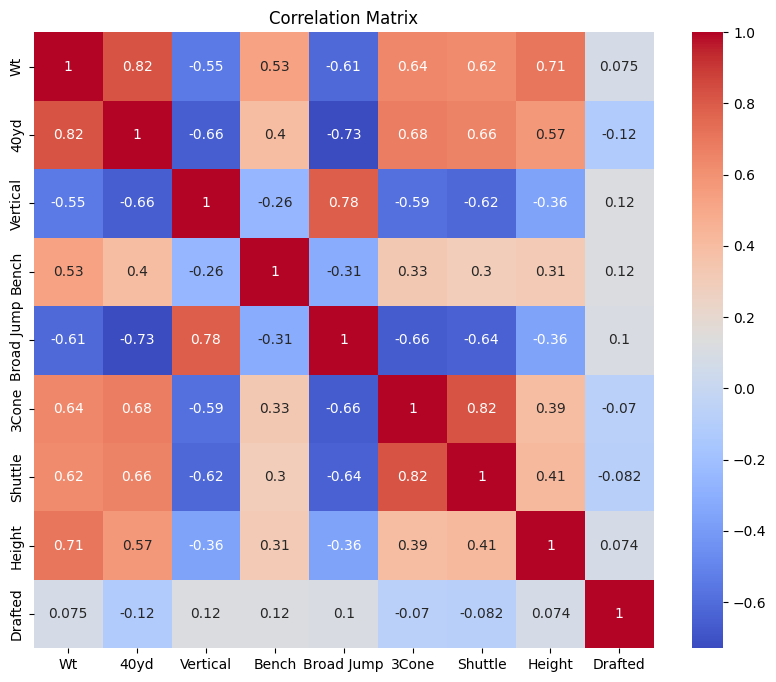

In [64]:
# Calculate the correlation matrix
correlation_matrix = combined_df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title('Correlation Matrix')
plt.show()


In [67]:
#Logistic Regression


# Select the relevant columns for prediction
feature_columns = ['Wt', '40yd', 'Vertical', 'Bench', 'Broad Jump', '3Cone', 'Shuttle', 'Height']
target_column = 'Drafted'

# Split the data into features and target variable
X = combined_df[feature_columns]
y = combined_df[target_column]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.6896701388888888


C:\Users\abhis\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [68]:
#Decision Tree

# Select the relevant columns for prediction
feature_columns = ['Wt', '40yd', 'Vertical', 'Bench', 'Broad Jump', '3Cone', 'Shuttle', 'Height']
target_column = 'Drafted'

# Split the data into features and target variable
X = combined_df[feature_columns]
y = combined_df[target_column]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Decision Tree classifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.6280381944444444


In [69]:
#SVM

# Select the relevant columns for prediction
feature_columns = ['Wt', '40yd', 'Vertical', 'Bench', 'Broad Jump', '3Cone', 'Shuttle', 'Height']
target_column = 'Drafted'

# Split the data into features and target variable
X = combined_df[feature_columns]
y = combined_df[target_column]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the SVM classifier
model = SVC(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.6527777777777778


In [70]:
#Gradient Boosting Classifier (XGBoost):

# Select the relevant columns for prediction
feature_columns = ['Wt', '40yd', 'Vertical', 'Bench', 'Broad Jump', '3Cone', 'Shuttle', 'Height']
target_column = 'Drafted'

# Split the data into features and target variable
X = combined_df[feature_columns]
y = combined_df[target_column]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the XGBoost classifier
model = XGBClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.6710069444444444


In [66]:
#Random Forest

# Select the relevant columns for prediction
feature_columns = ['Wt', '40yd', 'Vertical', 'Bench', 'Broad Jump', '3Cone', 'Shuttle', 'Height']
target_column = 'Drafted'

# Split the data into features and target variable
X = combined_df[feature_columns]
y = combined_df[target_column]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.6875
